In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

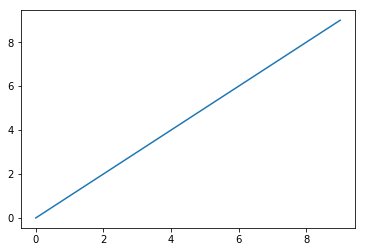

In [3]:
plt.plot(data)

### Figure和Subplot

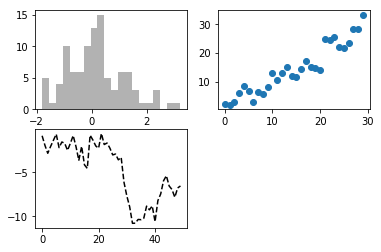

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30) + 3*np.random.randn(30))
#matplotlib就会在最后一个用过的subplot（如果没有则创建一个）上进行绘制
plt.plot(np.random.randn(50).cumsum(),'k--')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000006618470>,
      dtype=object)

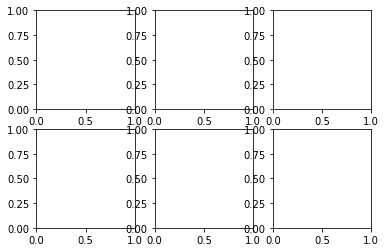

In [10]:
#plt.subplots，它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组
fig,axes = plt.subplots(2,3)
axes

### 调整subplot周围的间距  subplots_adjust

In [12]:
#Figure的subplots_adjust方法可以轻而易举地修改间距

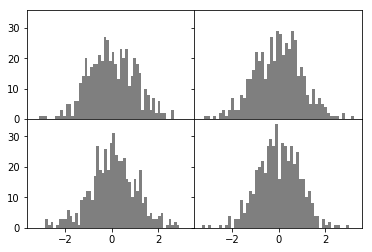

In [22]:
#wspace和hspace用于控制宽度和高度的百分比，可以用作subplot之间的间距
fig,axes = plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)

### 颜色、标记和线型 ax.plot(x,y,'g--') 等价于 ax.plot(x, y, linestyle='--', color='g')

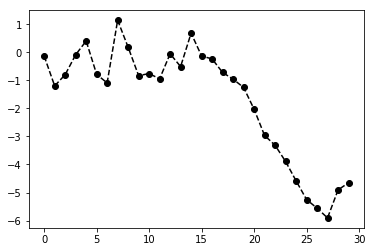

In [24]:
from numpy.random import randn
plt.plot(randn(30).cumsum(),'ko--')
#plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o') #可以写成这种模式

In [25]:
plt.close('all')

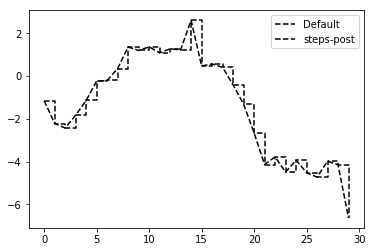

In [51]:
data = np.random.randn(30).cumsum()
plt.plot(data,'k--',label='Default')
plt.plot(data,'k--',drawstyle='steps-post',label='steps-post')
plt.legend(loc='best')

### 设置标题、刻度、轴标签和图例

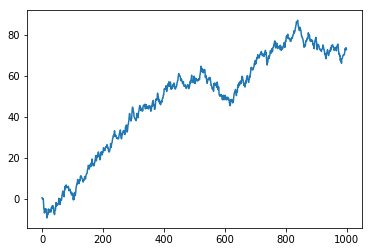

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

In [33]:
#改变x轴刻度，最简单的办法是使用set_xticks和set_xticklabels
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],rotation=30,fontsize='small') #通过set_xticklabels将任何其他的值用作标签
                                                              # rotation选项设定x刻度标签倾斜30度

In [38]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [39]:
ax.set_xlabel('Stages')

Text(0.5, 3.1999999999999993, 'Stages')

In [40]:
props = {
'title': 'My first matplotlib plot',
'xlabel': 'Stages'
}
ax.set(**props)

[Text(0.5, 3.1999999999999993, 'Stages'),
 Text(0.5, 1.0, 'My first matplotlib plot')]

### 添加图例

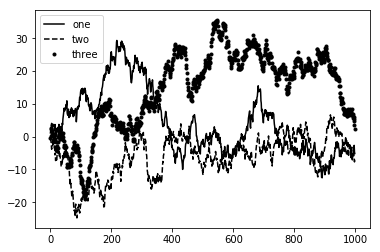

In [49]:
from numpy.random import randn
fig = plt.figure();ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'k',label='one')
ax.plot(randn(1000).cumsum(),'k--',label='two')
ax.plot(randn(1000).cumsum(),'k.',label='three')
ax.legend(loc='best')

### 注解以及在Subplot上绘图  text、arrow和annotate
例子：ax.text(x, y, 'Hello world!',family='monospace', fontsize=10)

Text(0.5, 1.0, 'Importance dates in the 2008-2009 financial crisis')

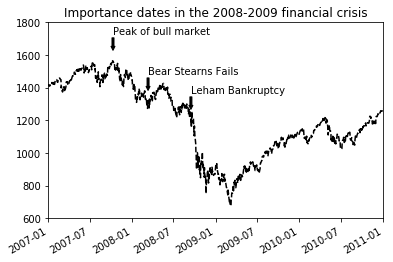

In [4]:
from datetime import datetime
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
f = open('D:\Jupyter\利用Python进行数据分析2\yjx\Python-\chapter9\data\spx.csv')
data = pd.read_csv(f,index_col=0,parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax,style='k--')
crisis_data = [
    (datetime(2007,10,11),'Peak of bull market'),
    (datetime(2008,3,12),'Bear Stearns Fails'),
    (datetime(2008,9,15),'Leham Bankruptcy')
]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4,width=2,headlength=4),
                horizontalalignment='left', verticalalignment='top')
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600,1800])
ax.set_title('Importance dates in the 2008-2009 financial crisis')

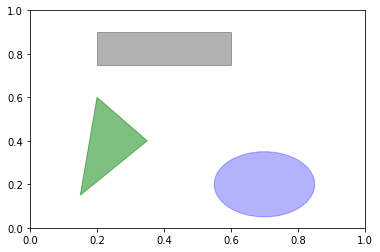

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
rect = plt.Rectangle((0.2,0.75),0.4,0.15,color='k',alpha=0.3)
circ = plt.Circle((0.7,0.2),0.15,color='b',alpha=0.3)
pgon = plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]],color='g',alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 将图表保存到文件 plt.savefig('figpath.svg')

In [ ]:
#要得到一张带有最小白边且分辨率为400DPI的PNG图片
#plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

## pandas和seaborn绘图

### 线型图

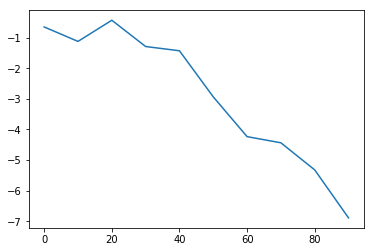

In [6]:
s = pd.Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s.plot()

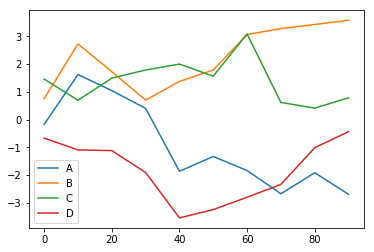

In [7]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),columns=['A', 'B', 'C', 'D'],index=np.arange(0, 100, 10))
df.plot()

### 柱状图 plot.bar()和plot.barh()分别绘制水平和垂直的柱状图

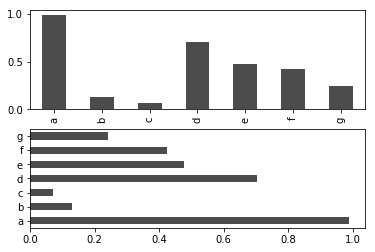

In [17]:
fig,axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(7),index=list('abcdefg'))
data.plot.bar(ax=axes[0],color='k',alpha=0.7)
data.plot.barh(ax=axes[1],color='k',alpha=0.7)

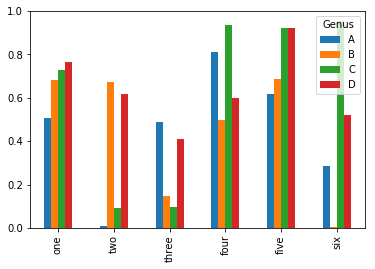

In [18]:
df = pd.DataFrame(np.random.rand(6, 4), index=['one', 'two', 'three', 'four','five', 'six'], 
                  columns=pd.Index(['A', 'B', 'C', 'D'],name='Genus'))
df.plot.bar()

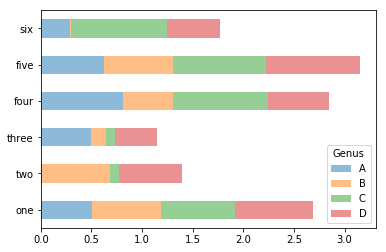

In [19]:
df.plot.barh(stacked=True, alpha=0.5)

In [26]:
f = open('D:\\Jupyter\\利用Python进行数据分析2\\yjx\\Python-\\chapter9\\data\\tips.csv')
tips = pd.read_csv(f)
party_count = pd.crosstab(tips['day'],tips['size'])
party_count

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [24]:
%pwd

'D:\\Jupyter\\利用Python进行数据分析2\\yjx\\Python-\\chapter9'

In [28]:
party_counts = party_count.loc[:,2:5]
party_pcts = party_counts.div(party_counts.sum(1),axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


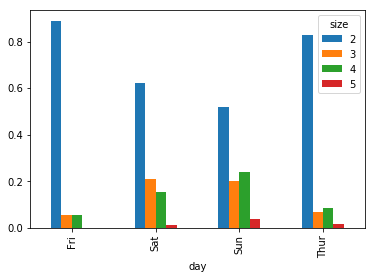

In [29]:
party_pcts.plot.bar()

In [30]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


c:\users\yjx\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


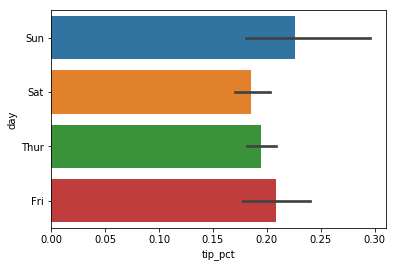

In [31]:
sns.barplot(x='tip_pct',y='day',data=tips,orient='h')

c:\users\yjx\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


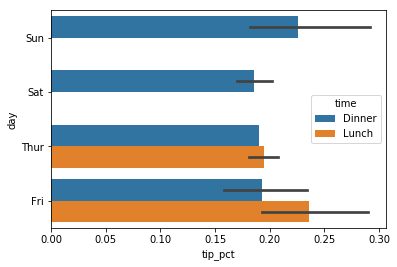

In [32]:
sns.barplot(x='tip_pct',y='day',hue='time',data=tips,orient='h')

### 直方图plot.hist  和密度图plot.kde

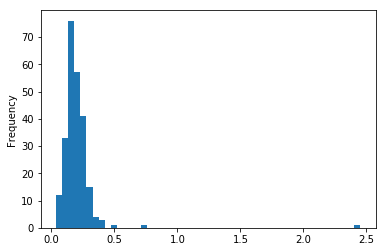

In [33]:
tips['tip_pct'].plot.hist(bins=50)

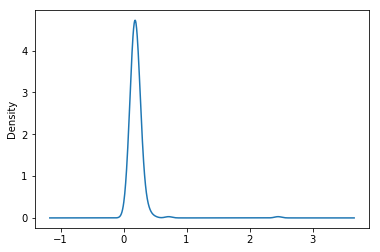

In [34]:
tips['tip_pct'].plot.density()

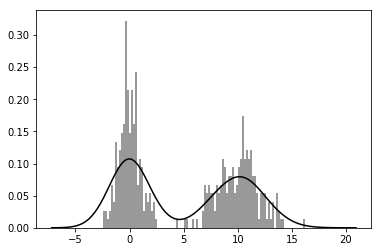

In [35]:
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2]))
sns.distplot(values,bins=100,color='k')

### 散布图或点图

In [36]:
f1 = open('D:\Jupyter\利用Python进行数据分析2\yjx\Python-\chapter9\data\macrodata.csv')
macro = pd.read_csv(f1)
data = macro[['cpi','m1','tbilrate','unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Change in loog m1 versus log unemp')

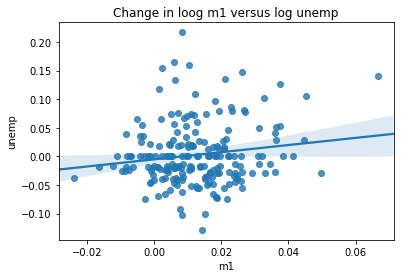

In [38]:
sns.regplot('m1','unemp',data = trans_data)
plt.title('Change in loog %s versus log %s'%('m1','unemp'))

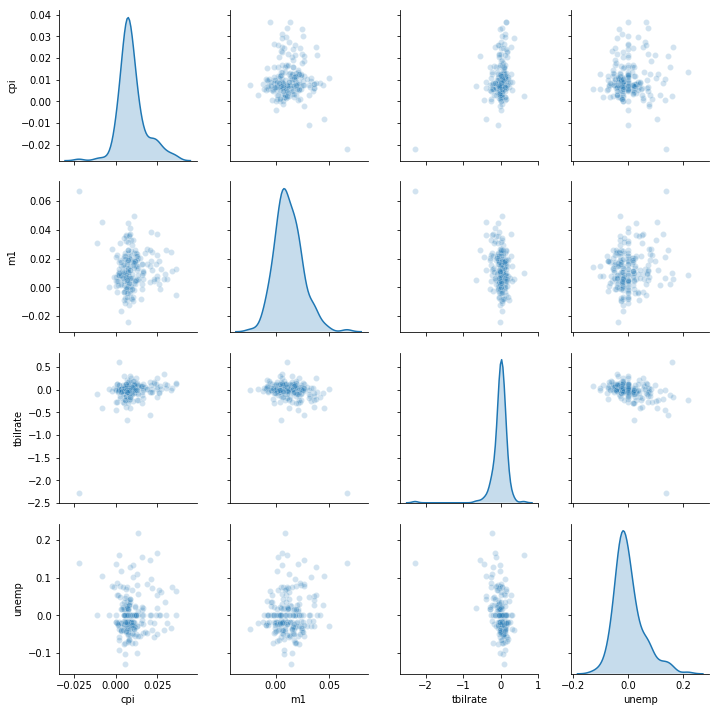

In [39]:
#pairplot函数，它支持在对角线上放置每个变量的直方图或密度估计
sns.pairplot(trans_data,diag_kind='kde',plot_kws={'alpha':0.2})

c:\users\yjx\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\yjx\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


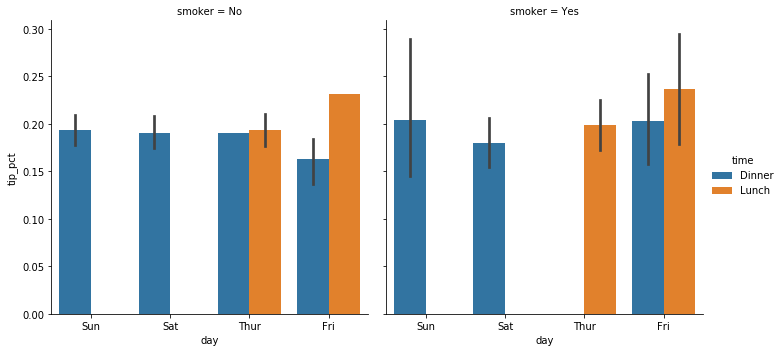

In [40]:
#factorplot，可以简化制作多种分面图
sns.factorplot(x='day',y='tip_pct',hue='time',col='smoker',kind='bar',data=tips[tips.tip_pct < 1])

c:\users\yjx\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\yjx\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


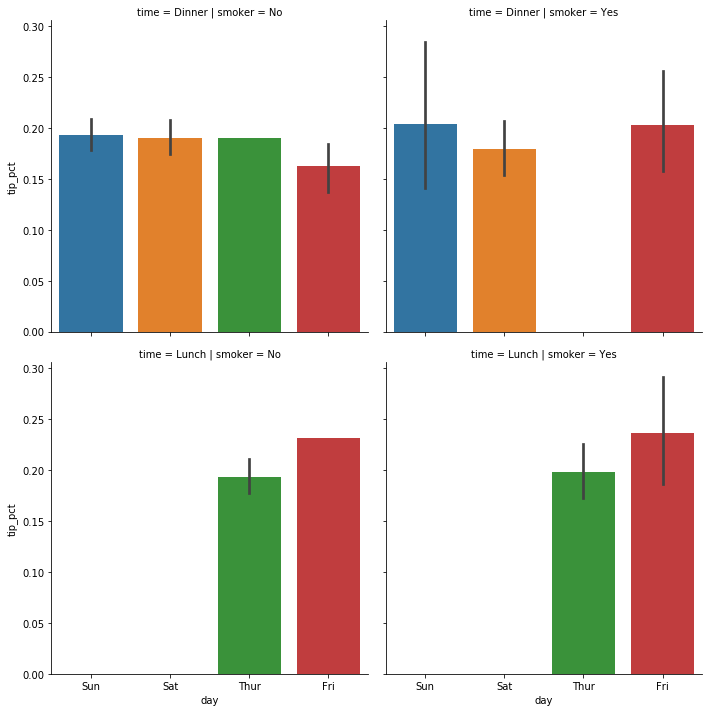

In [41]:
sns.factorplot(x='day',y='tip_pct',row='time',col='smoker',kind='bar',data=tips[tips.tip_pct < 1])

c:\users\yjx\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


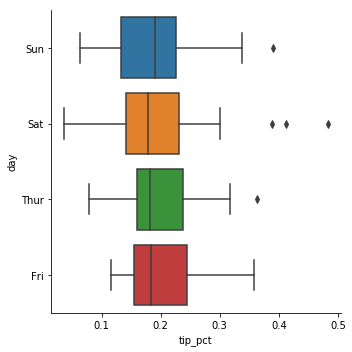

In [42]:
#盒图（它可以显示中位数，四分位数，和异常值）就是一个有用的可视化类型
sns.factorplot(x='tip_pct',y='day',kind='box',data=tips[tips.tip_pct < 0.5])